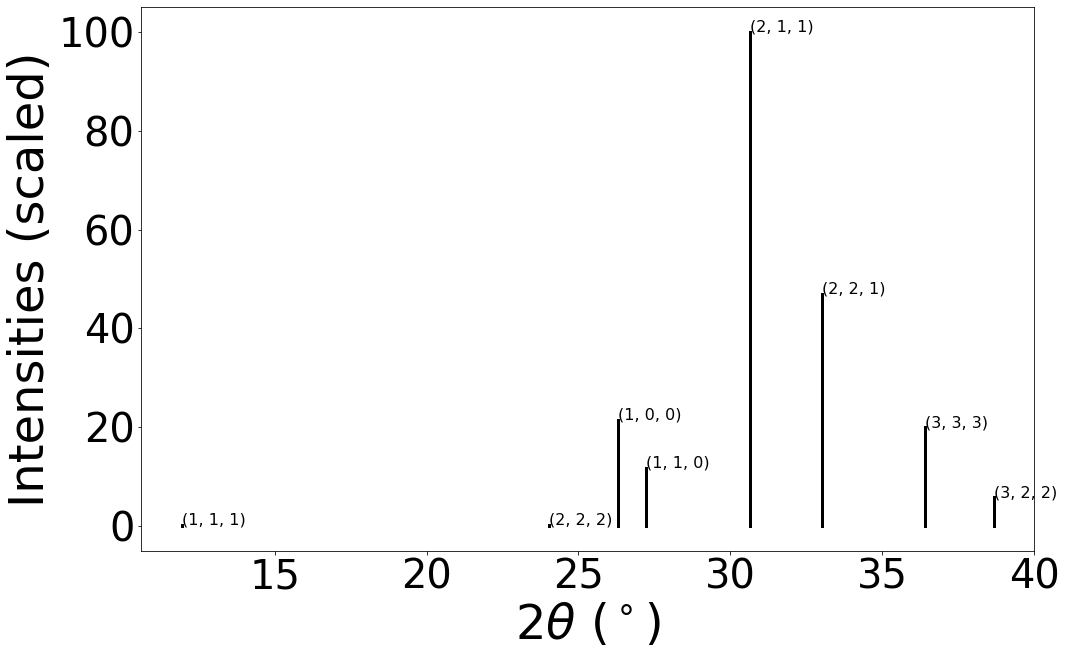

None


In [2]:
from pymatgen import Lattice, Structure, Molecule
from pymatgen.ext.matproj import MPRester
from jupyter_jsmol.pymatgen import quick_view
from math import *
import numpy as np
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.analysis.diffraction.xrd import *

with MPRester("d4klromGgnasAIpD") as m:

    # Structure for material id
    structure = m.get_structure_by_material_id("mp-23056")
    
pattern = XRDCalculator('CuKa').get_pattern(structure)
print(XRDCalculator('CuKa').show_plot(structure, two_theta_range=(0,40)))

Voici les trois premiers pics du diffractogramme pour un rayonnement X incident Cu Kα de longueur d’onde λ=1.54060 Å sur le $Sr_2BrN$, illustrés ci-dessus:  


In [3]:
print('Le premier pic de diffraction a lieu pour un angle 2 theta = {}°, \n est d intensité {} %, \n ses indices hkl associés sont {}, \n et la distance interplan associés à ces indices est {} Å'.format(pattern.x[0],pattern.y[0], pattern.hkls[0],pattern.d_hkls[0]))

Le premier pic de diffraction a lieu pour un angle 2 theta = 11.950361564849123°, 
 est d intensité 0.29735248964990557 %, 
 ses indices hkl associés sont [{'hkl': (1, 1, 1), 'multiplicity': 2}], 
 et la distance interplan associés à ces indices est 7.405738789022682 Å


In [4]:
print('Le second pic de diffraction a lieu pour un angle 2 theta = {}°, \n est d intensité {} %, \n ses indices hkl associés sont {}, \n et la distance interplan associés à ces indices est {} Å'.format(pattern.x[1],pattern.y[1], pattern.hkls[1],pattern.d_hkls[1]))

Le second pic de diffraction a lieu pour un angle 2 theta = 24.0332261537458°, 
 est d intensité 0.28141696344564127 %, 
 ses indices hkl associés sont [{'hkl': (2, 2, 2), 'multiplicity': 2}], 
 et la distance interplan associés à ces indices est 3.702869394511341 Å


In [5]:
print('Le troisième pic de diffraction a lieu pour un angle 2 theta = {}°, \n est d intensité {} %, \n ses indices hkl associés sont {}, \n et la distance interplan associés à ces indices est {} Å'.format(pattern.x[2],pattern.y[2], pattern.hkls[2],pattern.d_hkls[2]))

Le troisième pic de diffraction a lieu pour un angle 2 theta = 26.314681522886065°, 
 est d intensité 21.51307017863842 %, 
 ses indices hkl associés sont [{'hkl': (1, 0, 0), 'multiplicity': 6}], 
 et la distance interplan associés à ces indices est 3.3867845597977753 Å


On peut expliquer la présence de ces pics et leur intensité grâce à l'expression du facteur de structure de la maille $S_K$ puisque l'intensité des pics est proportionnelle à la valeur absolue de $S_K^2$:


$S_K = \sum_{j=1}^{N} f_j(K) e^{iK \dot r_j'}$ où $f_j(K)$ est le facteur de forme atomique, N le nombre d'atomes de la maille, $r_j$ la position de l'atome j dans la maille, K le vecteur du réseau réciproque.

On trouve les angles $2\theta$ pour lesquels il y a un pic de diffraction avec la loi de Bragg: $2d_{hkl} sin\theta = n\lambda$. La longueur d'onde $\lambda$ est connue et vaut 1.54060 Å, n vaut 1 (l'intensité des pics pour n différent de 1 est très faible), et on trouve la distance interplan comme $d_{hkl} = \frac{2\pi}{\vert v \vert}$ et ${\vert v \vert} = \sqrt{h^2 a^{*2} + k^2 b^{*2} + l^2 c^{*2}} $ où $a^*,b^*$ et $c^*$ sont les vecteurs de base du réseau réciproque, trouvés dans la tâche 5, dans le dossier lattice. On retrouve donc avec ces formules les angles $2\theta$ des trois premiers pics de diffraction:

In [6]:
matrice = structure.lattice.reciprocal_lattice.matrix
h=[1,2,1]
k=[1,2,0]
l=[1,2,0]
lamb = 1.54060
for i in range(3):
    v=np.linalg.norm(h[i]*matrice[0]+k[i]*matrice[1]+l[i]*matrice[2])
    d=2*pi/v
    deux_theta =  asin(lamb / (2*d))*2 *180/pi #passage en degré avec le facteur 180/pi
    print(deux_theta,'°')

11.940715727499446 °
24.013609704255337 °
26.293138812769833 °
